In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize']=[10,5]
plt.rcParams['figure.dpi']=150
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [2]:
x=pd.read_csv('/content/Titanic_train.csv')
y=pd.read_csv('/content/Titanic_test.csv')
x.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
y

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [4]:
x.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
x.describe(include=object)

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


In [6]:
x.duplicated().sum()

0

In [7]:
#Missing value
x.isna().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [8]:
#Drop columns Name as it is irrelevant and Cabin as it has more than 80% data missing
x.drop(['Name','Cabin','Ticket'],axis=1,inplace=True)

In [9]:
x[x['Embarked'].isna()]

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
61,62,1,1,female,38.0,0,0,80.0,NaN
829,830,1,1,female,62.0,0,0,80.0,NaN


In [10]:
x['Embarked'].value_counts()

,count
Embarked,
S,644
C,168
Q,77


In [11]:
x[(x['Pclass'] == 1) & (x['Survived']==1)].groupby(['Fare','Sex'])['Embarked'].value_counts()

,,,count
Fare,Sex,Embarked,
25.9292,female,S,2
26.2833,female,S,1
26.2875,male,S,3
26.3875,male,S,1
26.5500,female,S,1
...,...,...,...
247.5208,female,C,1
262.3750,female,C,2
263.0000,female,S,2


In [12]:
#Drop rows of Embarked columns where the values are missing as it is less than 6%.
x.dropna(subset=['Embarked'],inplace=True)
x

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.0,0,0,13.0000,S
887,888,1,1,female,19.0,0,0,30.0000,S
888,889,0,3,female,NaN,1,2,23.4500,S
889,890,1,1,male,26.0,0,0,30.0000,C


In [13]:
print((x['Age'].isna().sum()/len(x))*100)

19.910011248593925


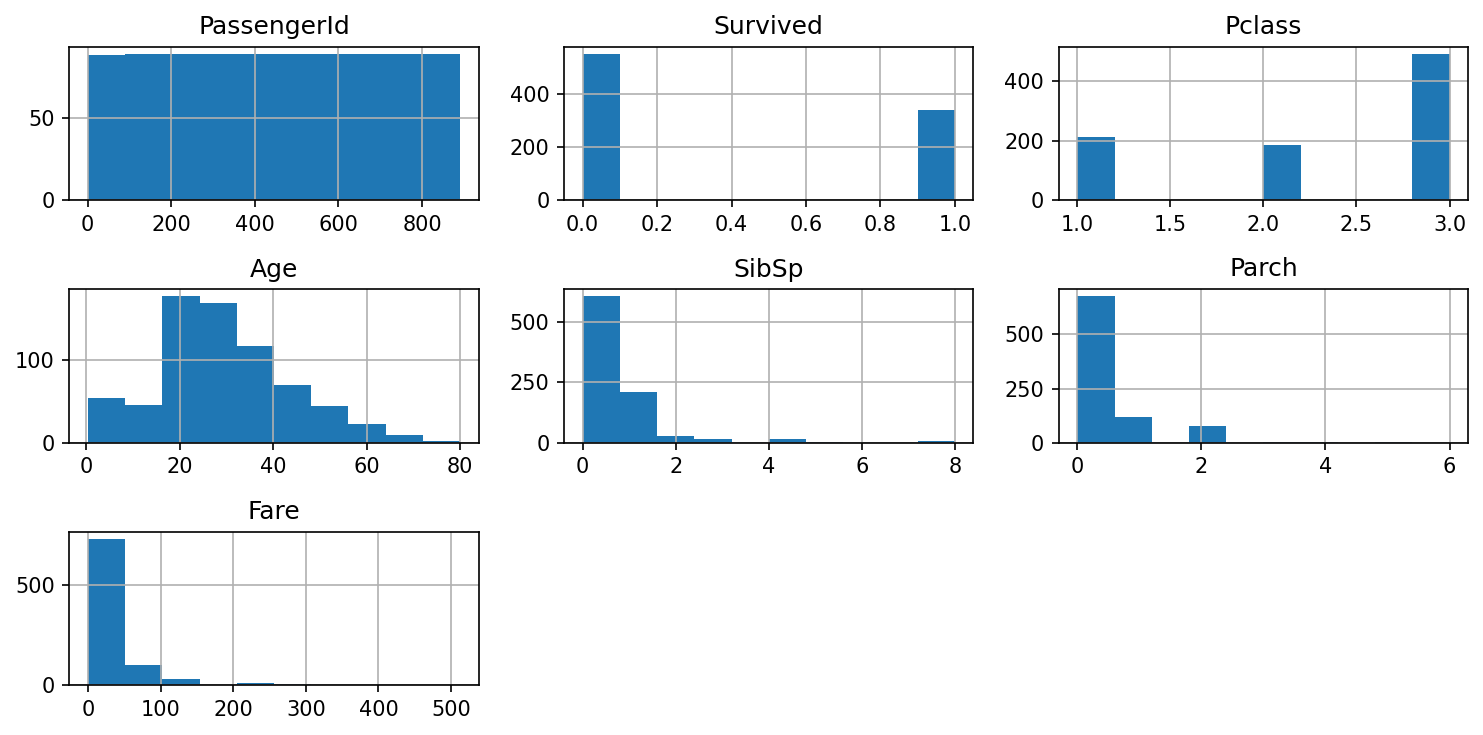

In [14]:
#Replace the missing values of Age column as missing value percentage is 19.91%.
#Replacing it with median if outliers are present and with mean if no outliers.
x.hist()
plt.tight_layout()

<Axes: >

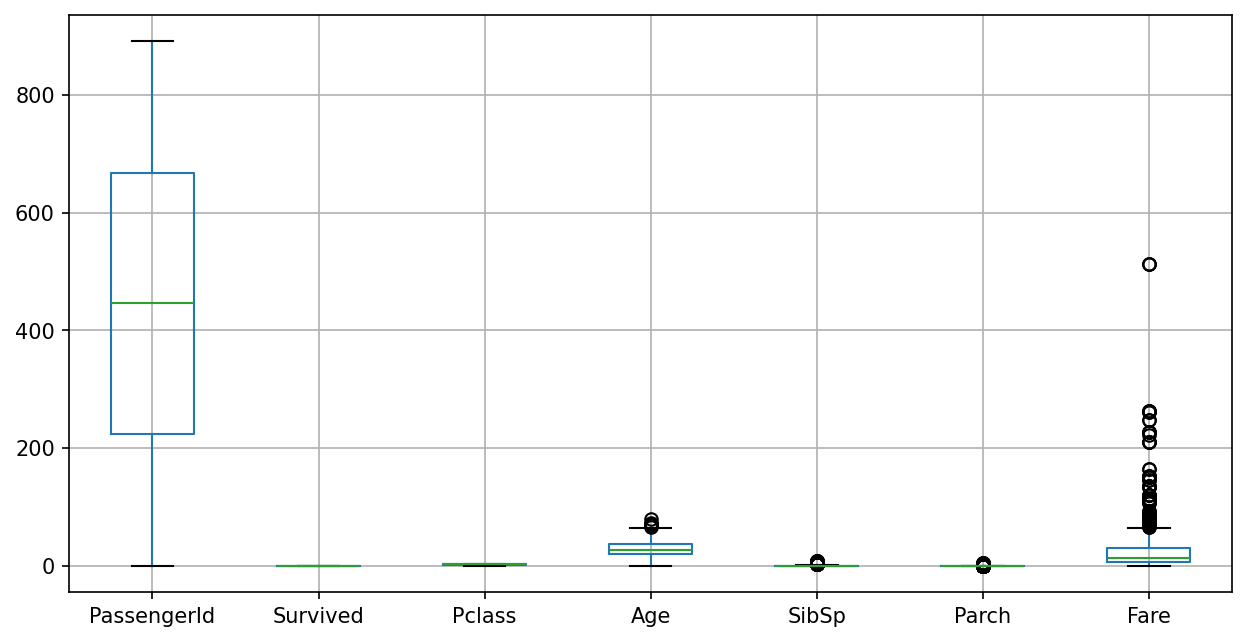

In [15]:
x.boxplot()
#Outliers are present in Age,Sib,Parch,Fare

In [16]:
x['Age'].fillna(x['Age'].median(),inplace=True)
x.isna().sum()
#Missing values are imputed

,0
PassengerId,0
Survived,0
Pclass,0
Sex,0
Age,0
SibSp,0
Parch,0
Fare,0
Embarked,0


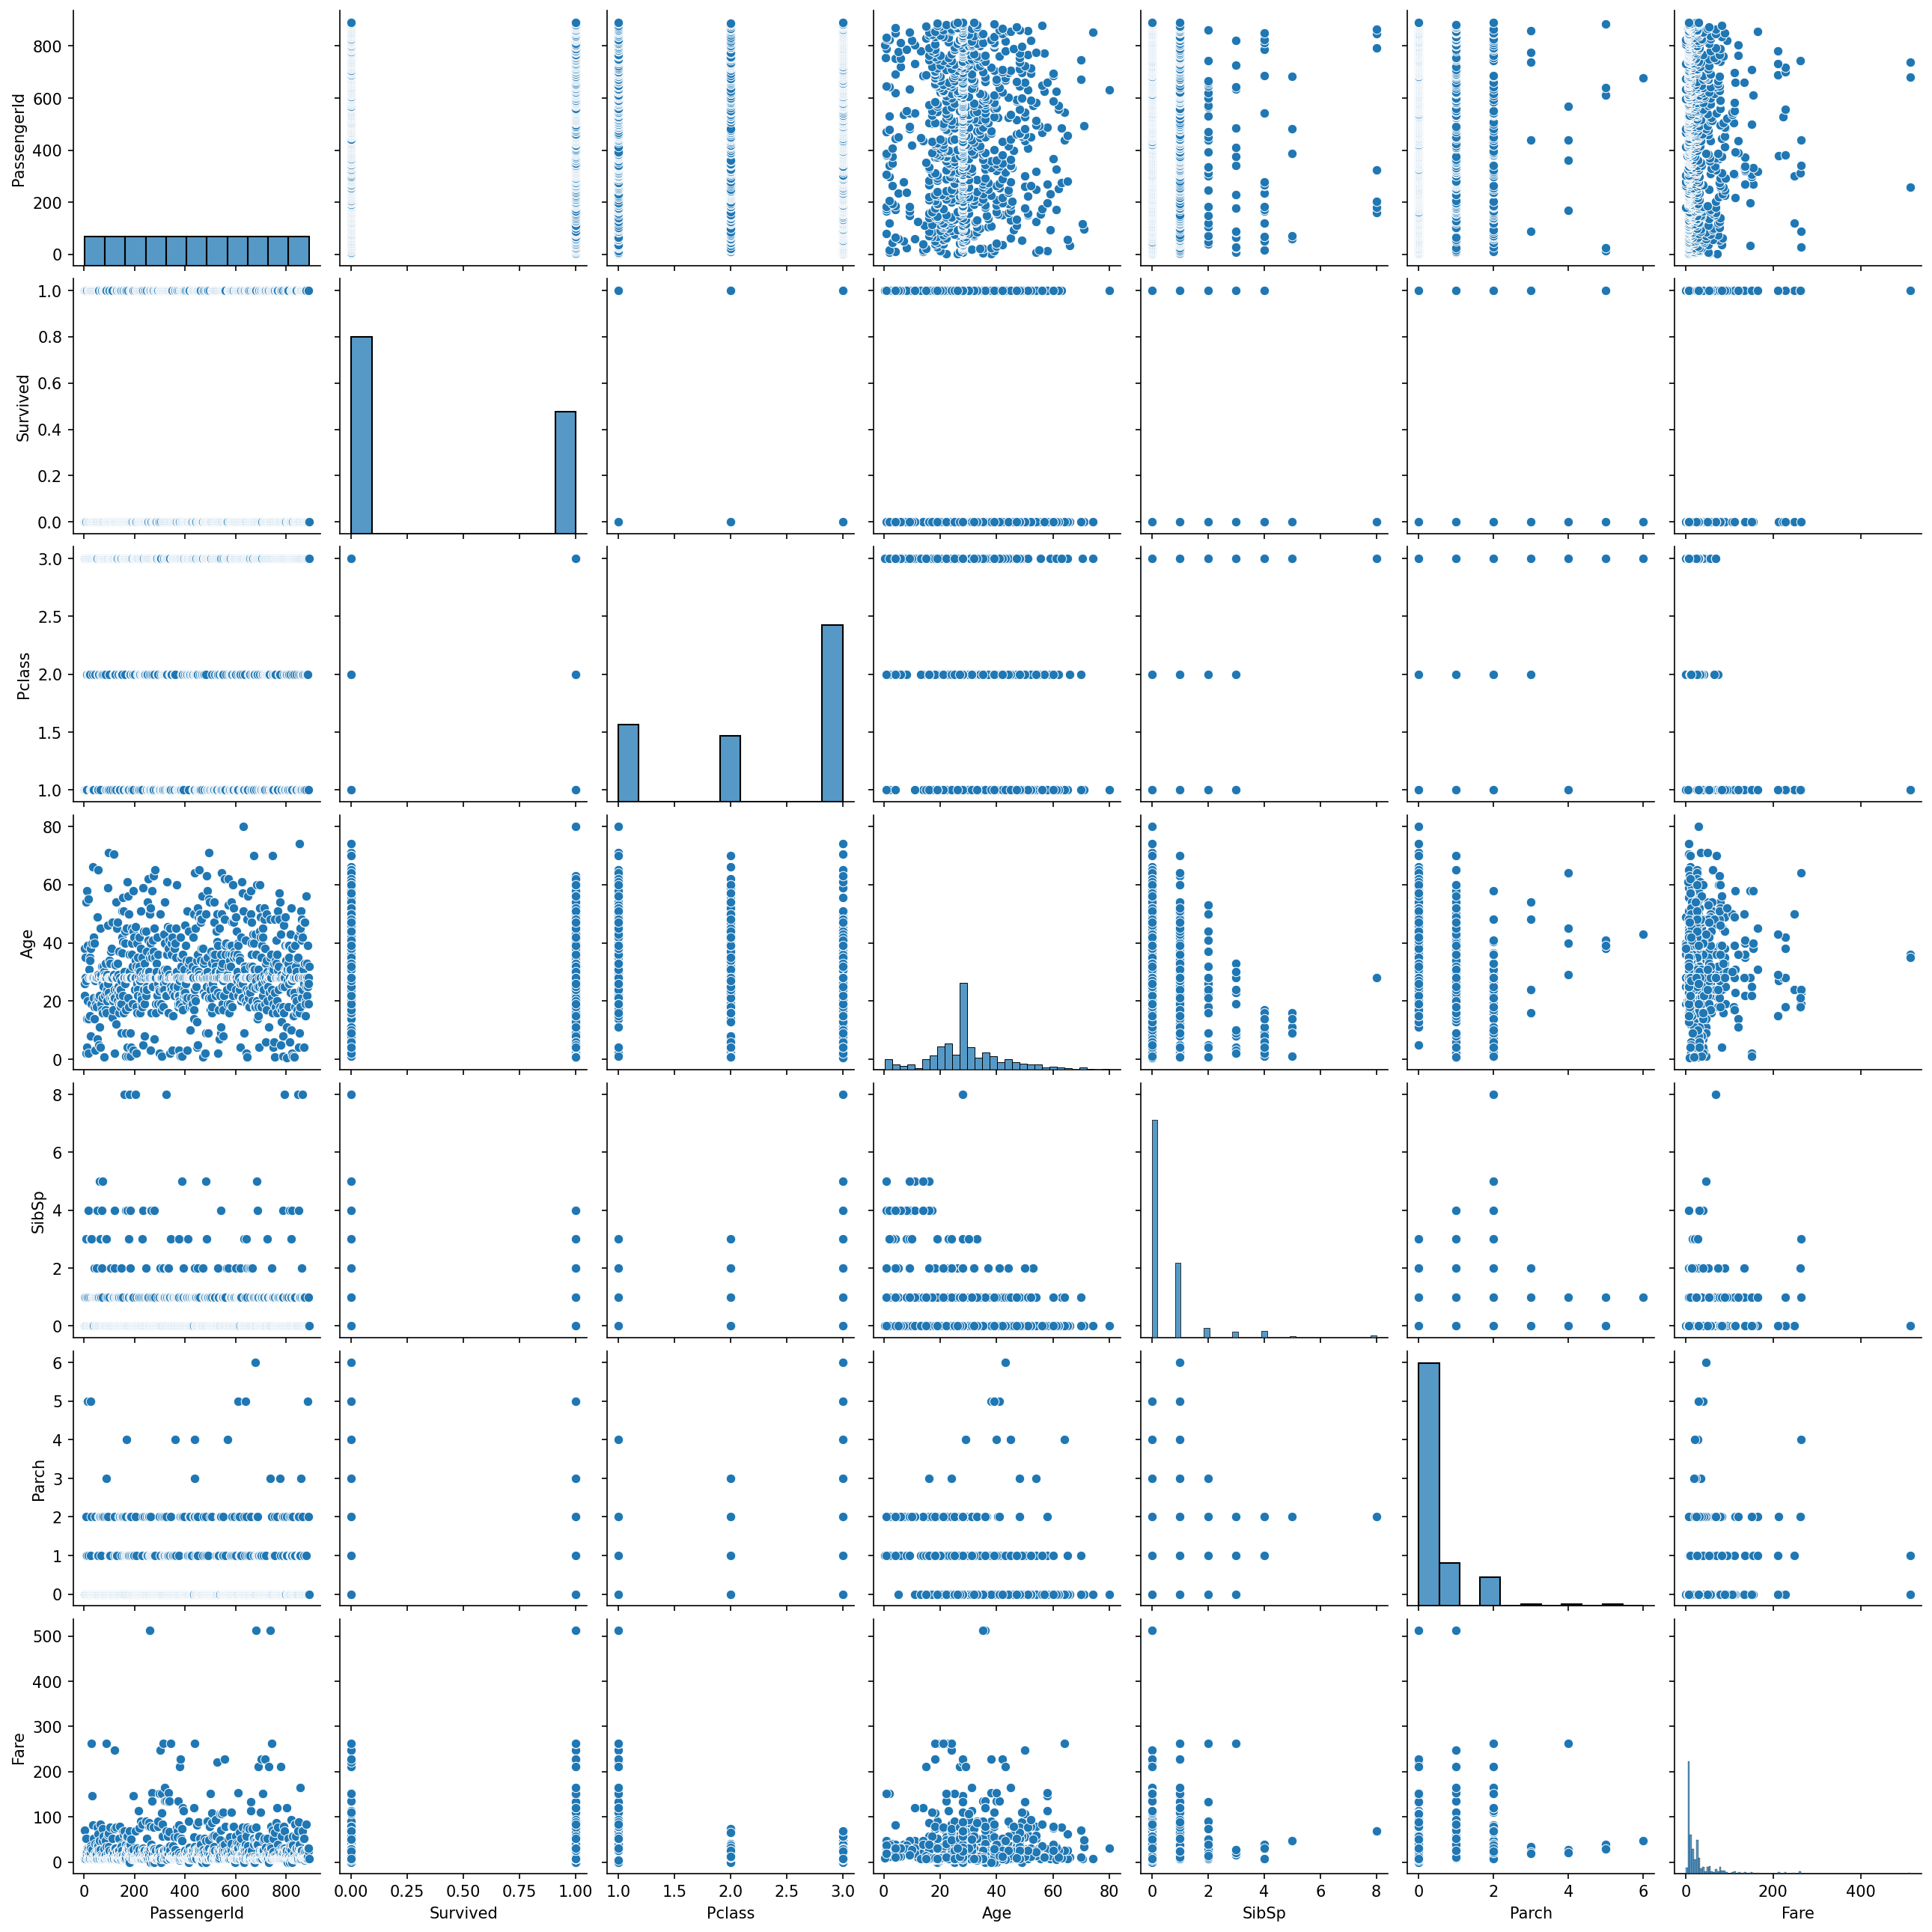

In [17]:
#Visualizing the realtionship between the features
sns.pairplot(x)

In [18]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
x['Sex']=le.fit_transform(x['Sex'])
x['Embarked']=le.fit_transform(x['Embarked'])
x.set_index('PassengerId',inplace=True)
x

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,,
1,0,3,1,22.0,1,0,7.2500,2
2,1,1,0,38.0,1,0,71.2833,0
3,1,3,0,26.0,0,0,7.9250,2
4,1,1,0,35.0,1,0,53.1000,2
5,0,3,1,35.0,0,0,8.0500,2
...,...,...,...,...,...,...,...,...
887,0,2,1,27.0,0,0,13.0000,2
888,1,1,0,19.0,0,0,30.0000,2
889,0,3,0,28.0,1,2,23.4500,2


In [19]:
y

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [20]:
y.duplicated().sum()
#Missing value


0

In [21]:
y.isna().sum()

,0
PassengerId,0
Pclass,0
Name,0
Sex,0
Age,86
SibSp,0
Parch,0
Ticket,0
Fare,1
Cabin,327


In [22]:
y.drop(['Name','Cabin','Ticket'],axis=1,inplace=True)

In [23]:
y['Age'].fillna(y['Age'].median(),inplace=True)
y['Fare'].fillna(y['Fare'].median(),inplace=True)
y.isna().sum()

,0
PassengerId,0
Pclass,0
Sex,0
Age,0
SibSp,0
Parch,0
Fare,0
Embarked,0


In [24]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
y['Sex']=le.fit_transform(y['Sex'])
y['Embarked']=le.fit_transform(y['Embarked'])
y.set_index('PassengerId',inplace=True)
y

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,
892,3,1,34.5,0,0,7.8292,1
893,3,0,47.0,1,0,7.0000,2
894,2,1,62.0,0,0,9.6875,1
895,3,1,27.0,0,0,8.6625,2
896,3,0,22.0,1,1,12.2875,2
...,...,...,...,...,...,...,...
1305,3,1,27.0,0,0,8.0500,2
1306,1,0,39.0,0,0,108.9000,0
1307,3,1,38.5,0,0,7.2500,2


In [25]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,StackingClassifier,BaggingClassifier
from sklearn.model_selection import cross_val_score


In [26]:
!pip install xgboost

In [27]:
from xgboost import XGBClassifier

In [28]:
xtrain=x.iloc[:,1:]
xtest=x.iloc[:,0]
ytrain=y.iloc[:,:]

In [29]:
#LightGBM
#Hyperparameter Tuning
params={'n_estimators':[90,110,150],'learning_rate':[0.5,0.6,0.7,0.9,1],'max_depth':[3,5,7,11]}

In [30]:
grid=GridSearchCV(GradientBoostingClassifier(),param_grid=params,verbose=1)
grid.fit(xtrain,xtest)
grid.best_params_

Fitting 5 folds for each of 60 candidates, totalling 300 fits


{'learning_rate': 0.7, 'max_depth': 3, 'n_estimators': 90}

In [37]:
#Useddefinedfunctionformodelbuilding
def prediction(model):
  model.fit(xtrain,xtest)
  ypred=model.predict(ytrain)
  print('Train Accuracy:',model.score(xtrain,xtest))
  print('Test Accuracy:',model.score(ytrain,ypred))


In [38]:
prediction(GradientBoostingClassifier(learning_rate=0.7,max_depth=3,n_estimators=110))

Train Accuracy: 0.9763779527559056
Test Accuracy: 1.0


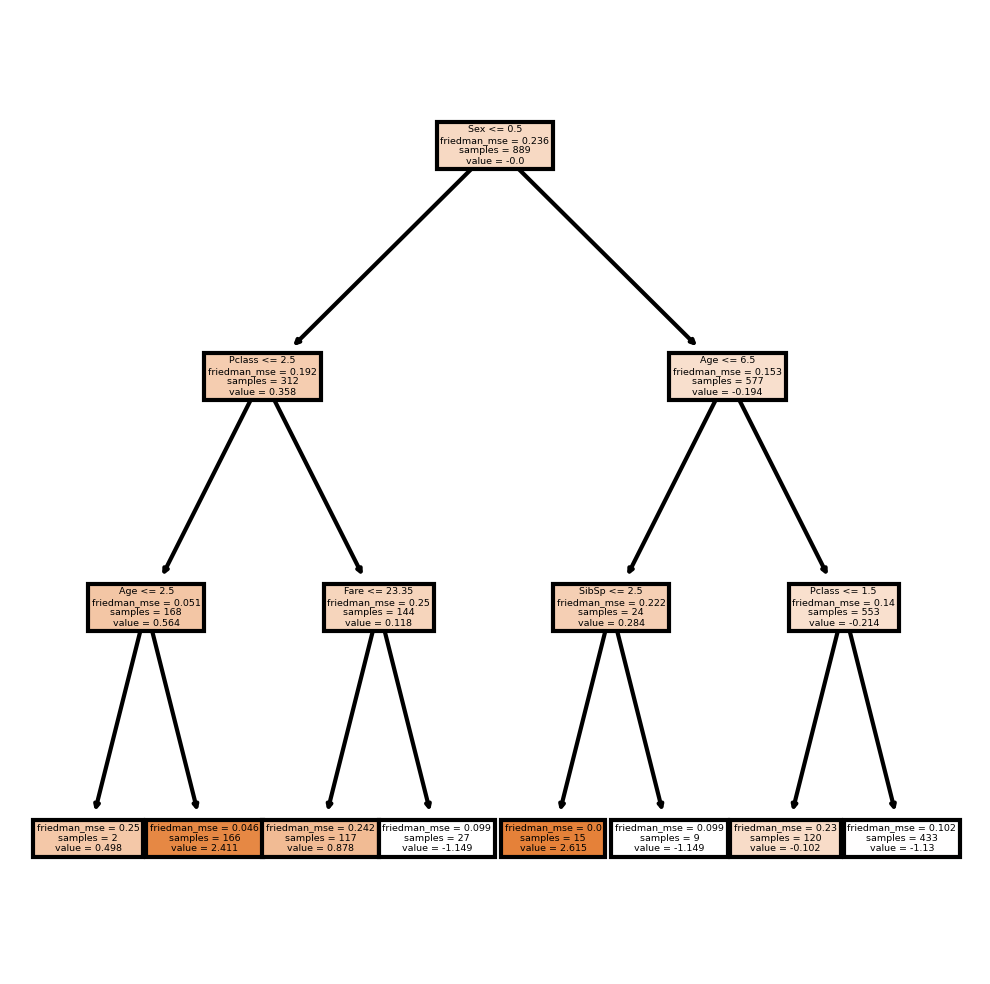

In [45]:
from sklearn import tree

# Create and fit the model
model = GradientBoostingClassifier(learning_rate=0.7, max_depth=3, n_estimators=110)
model.fit(xtrain, xtest) # Fit the model to your training data
fn=['Pclass','Sex','Age','SibSp','Parch','Fare','Embarked']
cn=['Survived']
fig,axes=plt.subplots(nrows=1,ncols=1,figsize=(4,4),dpi=300)
# Now you can plot the tree (although it will only plot one of the trees in the ensemble)
tree.plot_tree(model.estimators_[0, 0],feature_names=fn,class_names=cn,filled=True)  # Access and plot the first tree
plt.show()  # Display the plot

In [39]:
#XGBM CLASSIFIER

In [40]:
!pip install scikit-learn==1.2.2  # Ensure scikit-learn is downgraded
!pip install xgboost==1.7.6     # Install a compatible XGBoost version
#Hyperparameter Tuning
params={'n_estimators':[90,110,150],'learning_rate':[0.5,0.6,0.7,0.9,1],'lambda':[1,2,3],'max_depth':[3,5,7,11]}
grid=GridSearchCV(XGBClassifier(),param_grid=params,verbose=1)
grid.fit(xtrain,xtest)
grid.best_params_

Fitting 5 folds for each of 180 candidates, totalling 900 fits


{'lambda': 3, 'learning_rate': 0.6, 'max_depth': 3, 'n_estimators': 90}

In [36]:
xgb=XGBClassifier(learning_rate=0.6,max_depth=3,n_estimators=90,reg_lambda=3)
prediction(xgb)

Train Accuracy: 0.922384701912261
Test Accuracy: 0.922384701912261


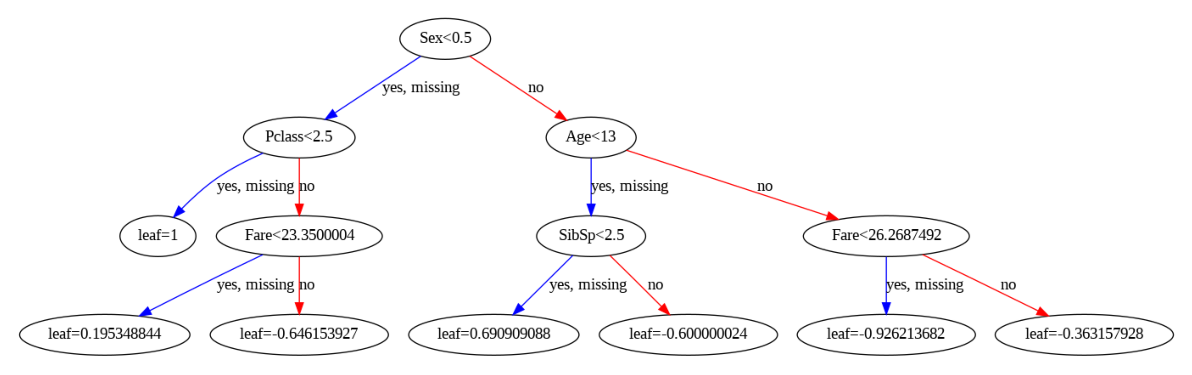

In [44]:
from sklearn import tree
from xgboost import plot_tree  # Import the correct plotting function for XGBoost
import matplotlib.pyplot as plt

# Create and fit the model
model = XGBClassifier(learning_rate=0.6, max_depth=3, n_estimators=90, reg_lambda=3)
model.fit(xtrain, xtest) # Fit the model to your training data

# Plot the first tree in the XGBoost model
plot_tree(model, num_trees=0)  # num_trees=0 refers to the first tree
plt.show()  # Display the plot

As we can see
Training and testing accuracy for GradientBoosting model is high which makes the model overfitted
whereas
training and testing accuracy is better of XGBclassifier which makes the model a good fit.

**Comparative Analysis:**
1. In XGBoost, trees grow depth-wise, while in LightGBM, trees grow leaf-wise, which is the fundamental difference between the two frameworks.
2. XGBoost benefits from a large user base, resulting in extensive documentation and a wealth of resources for issue resolution. LightGBM, while powerful, has not yet achieved the same level of comprehensive documentation and community support.
3. Both the algorithms perform similarly in terms of model performance, but LightGBM training happens within a fraction of the time required by XGBoost.
Fast training in LightGBM makes it the go-to choice for machine learning experiments.
4. XGBoost requires a lot of resources to train on large amounts of data, which makes it an accessible option for most enterprises, while LightGBM is lightweight and can be used on modest hardware.
5. LightGBM provides the option for passing feature names that are to be treated as categories and handles this issue with ease by splitting on equality. H2O’s implementation of XGBoost provides the above feature as well, which is not yet provided by XGBoost’s original library.
6. Hyperparameter tuning is extremely important in both algorithms.